In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 이미지 준비

In [ ]:
%%bash
apt install -y imagemagick
[ ! -f flower_photos_300x200_small_train_test2.zip ]&& wget https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/flower_photos_300x200_small_train_test2.zip

rm -rf __MACOSX
rm -rf flowers
unzip -q flower_photos_300x200_small_train_test2.zip
mv flower_photos_300x200_small_train_test2 flowers

cd flowers
# files=$(find |grep "\.jpg$\|\.png$")
# for i in $files; do
#     # convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -colorspace Gray    ${i%.*}.png
#     convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -define png:color-type=2   ${i%.*}.png
    
#     # identify ${i%.*}.png
#     rm -f $i
# done

find .|grep .DS_Store|xargs rm -f
find .|head -n 10


Reading package lists...
Building dependency tree...
Reading state information...
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
.
./train
./train/tulip
./train/tulip/3454461550_64d6e726bf_m.png
./train/tulip/8454719295_4276c0e9c5_n.png
./train/tulip/7448453762_aea8739f1b.png
./train/tulip/3614805920_7a6610aa4b_n.png
./train/tulip/4300258119_b03f2f956e.png
./train/tulip/8673416556_639f5c88f1_n.png
./train/tulip/6931489544_2f35025f7b_m.png




--2020-12-01 05:59:08--  https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/flower_photos_300x200_small_train_test2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16601659 (16M) [application/zip]
Saving to: ‘flower_photos_300x200_small_train_test2.zip’

     0K .......... .......... .......... .......... ..........  0% 3.72M 4s
    50K .......... .......... .......... .......... ..........  0% 9.58M 3s
   100K .......... .......... .......... .......... ..........  0% 5.01M 3s
   150K .......... .......... .......... .......... ..........  1% 13.2M 3s
   200K .......... .......... .......... .......... ..........  1% 7.85M 2s
   250K .......... .......... .......... .......... ..........  1% 27.0M 2s
   300K .......... .......... .......... ...

In [ ]:
from os import listdir
from os.path import isfile, join, splitext
import cv2
def getFolder(thePath,isFile=True):
    return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]

def convert(thePath,to_w,to_h):
    ext=splitext(".jpg")[0]
    if ext in ('.jpg','.png'):
      img = cv2.imread(thePath)
      if (to_h,to_w,3) != img.shape :
        img = cv2.resize(img,(to_w,to_h))
        print(img.shape[0],img.shape[1],'to',to_w,to_h , thePath , )
        cv2.imwrite(thePath,img)
      # else:
      #   print(thePath,"is not changed (same)")

def convertAll(tPath,to_w,to_h):
  for folder in getFolder(tPath,False):
    print('-------------------')
    print(join(tPath,folder))
    convertAll(join(tPath,folder),to_w,to_h)
  for files in getFolder(tPath,True):
      convert(join(tPath,files),to_w,to_h)


tPath='/content/flowers/'


In [ ]:
convertAll(tPath,300,200)


-------------------
/content/flowers/train
-------------------
/content/flowers/train/tulip
-------------------
/content/flowers/train/daisy
-------------------
/content/flowers/test
-------------------
/content/flowers/test/tulip
-------------------
/content/flowers/test/daisy


In [ ]:
!apt install tree
!tree -d flowers
# dir(ImageDataGenerator)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
flowers
├── test
│   ├── daisy
│   └── tulip
└── train
    ├── daisy
    └── tulip

6 directories


# Image Loading

In [ ]:
# load and iterate training dataset
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory(directory='flowers/train/', class_mode='categorical', batch_size=64,target_size=(200, 300))
# load and iterate test dataset
test_data = datagen.flow_from_directory(directory='flowers/test/',  class_mode='categorical', batch_size=64,target_size=(200, 300))


Found 165 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [ ]:
# ImageDataGenerator의 각종 옵션 확인
print(
    f"""
      test_data.classes     ={test_data.classes}
      test_data.filepaths   ={test_data.filepaths}
      test_data.image_shape ={test_data.image_shape}
     """
)



      test_data.classes     =[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
      test_data.filepaths   =['flowers/test/daisy/14221836990_90374e6b34.png', 'flowers/test/daisy/14221848160_7f0a37c395.png', 'flowers/test/daisy/14471433500_cdaa22e3ea_m.png', 'flowers/test/daisy/14485782498_fb342ec301.png', 'flowers/test/daisy/14600779226_7bbc288d40_m.png', 'flowers/test/daisy/15784493690_b1858cdb2b_n.png', 'flowers/test/daisy/16161045294_70c76ce846_n.png', 'flowers/test/daisy/16401288243_36112bd52f_m.png', 'flowers/test/daisy/16527403771_2391f137c4_n.png', 'flowers/test/daisy/16819071290_471d99e166_m.png', 'flowers/test/daisy/18635898912_eb8e058ef0.png', 'flowers/test/daisy/19178753159_a471bf4b6b.png', 'flowers/test/daisy/19280272025_57de24e940_m.png', 'flowers/test/daisy/19544831049_0d738d4872_m.png', 'flowers/test/daisy/20580471306_ab5a011b15_n.png', 'flowers/test/daisy/20773528301_008fcbc5a1_n.png', 'flowers/test/daisy/21626652132_97e1318bb8_m.png', 'flowers/te

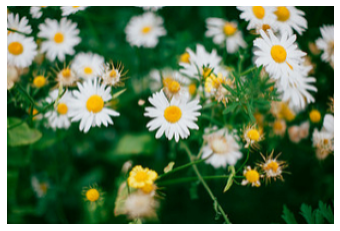

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
images,labels=test_data.next()
img=images[2]
plt.axis(False)
plt.imshow(img/255)
# == cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

NoneType